Table of Contents
1. Import Libraries & Define Path
2. Import Files
3. Cleanup
4. Correlations

    4.a. Heatmaps

    4.b. Scatterplots

    4.c. Pair Plot

    4.d. Categorical Plot

5. Key Questions

    5.a. Does gender distribution play a role in percentage of home ownership per area?

    5.b. Does high school diploma play a role in family income?

    5.c. Does high school diploma play a role in mortgage and expenses?

    5.d. Hypothesis: Where there are more male population and a higher percentage of high school diplomas, there will be a higher percentage of home ownership.

6. Additional Questions Raised

    6.a. Additional Hypothesis
7. Export

# 1. Import Libraries, Define Path

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

path = r'C:\Users\heidi\Desktop\Analyses\A6 Data Project'

# 2. Import Files

In [2]:
# import files
real = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'real.csv'), index_col = False)
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39030 entries, 0 to 39029
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         39030 non-null  int64  
 1   state_ab           39030 non-null  object 
 2   city               39030 non-null  object 
 3   place              39030 non-null  object 
 4   type               39030 non-null  object 
 5   lat                39030 non-null  float64
 6   lng                39030 non-null  float64
 7   pop                39030 non-null  int64  
 8   male_pop           39030 non-null  int64  
 9   female_pop         39030 non-null  int64  
 10  rent_mean          38568 non-null  float64
 11  rent_median        38568 non-null  float64
 12  income_mean        38640 non-null  float64
 13  income_median      38640 non-null  float64
 14  family_mean        38596 non-null  float64
 15  family_median      38596 non-null  float64
 16  mort_exp_mean      381

# 3. Cleanup

In [3]:
#drop unneeded columns
real.drop(columns = ['Unnamed: 0', 'place', 'family_mean', 'family_median'], inplace = True)
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39030 entries, 0 to 39029
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state_ab           39030 non-null  object 
 1   city               39030 non-null  object 
 2   type               39030 non-null  object 
 3   lat                39030 non-null  float64
 4   lng                39030 non-null  float64
 5   pop                39030 non-null  int64  
 6   male_pop           39030 non-null  int64  
 7   female_pop         39030 non-null  int64  
 8   rent_mean          38568 non-null  float64
 9   rent_median        38568 non-null  float64
 10  income_mean        38640 non-null  float64
 11  income_median      38640 non-null  float64
 12  mort_exp_mean      38189 non-null  float64
 13  mort_exp_median    38189 non-null  float64
 14  expenses_mean      38140 non-null  float64
 15  expenses:median    38140 non-null  float64
 16  hs_degree          387

In [4]:
# rename columns for clarity
real.rename(columns = {'state_ab' : 'state', 'expenses:median': 'expenses_median'}, inplace = True)
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39030 entries, 0 to 39029
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              39030 non-null  object 
 1   city               39030 non-null  object 
 2   type               39030 non-null  object 
 3   lat                39030 non-null  float64
 4   lng                39030 non-null  float64
 5   pop                39030 non-null  int64  
 6   male_pop           39030 non-null  int64  
 7   female_pop         39030 non-null  int64  
 8   rent_mean          38568 non-null  float64
 9   rent_median        38568 non-null  float64
 10  income_mean        38640 non-null  float64
 11  income_median      38640 non-null  float64
 12  mort_exp_mean      38189 non-null  float64
 13  mort_exp_median    38189 non-null  float64
 14  expenses_mean      38140 non-null  float64
 15  expenses_median    38140 non-null  float64
 16  hs_degree          387

# 4. Correlations

## 4.a. Heatmaps

In [5]:
# create correlation matrix
corr_matrix = real.corr()
print(corr_matrix)

                        lat       lng       pop  male_pop  female_pop  \
lat                1.000000  0.018296 -0.075855 -0.070520   -0.077872   
lng                0.018296  1.000000 -0.084304 -0.101587   -0.063139   
pop               -0.075855 -0.084304  1.000000  0.978118    0.977745   
male_pop          -0.070520 -0.101587  0.978118  1.000000    0.912702   
female_pop        -0.077872 -0.063139  0.977745  0.912702    1.000000   
rent_mean          0.002493 -0.168906  0.162892  0.159022    0.160086   
rent_median       -0.000360 -0.159270  0.156816  0.153828    0.153370   
income_mean        0.135695 -0.059263  0.169918  0.169756    0.163000   
income_median      0.139803 -0.056960  0.174527  0.175378    0.166394   
mort_exp_mean      0.104801 -0.094361  0.112996  0.110549    0.111836   
mort_exp_median    0.104832 -0.095095  0.107698  0.105241    0.106712   
expenses_mean      0.223053  0.154789  0.053295  0.042108    0.062521   
expenses_median    0.221573  0.161107  0.051386  0.

AxesSubplot(0.320313,0.125;0.424687x0.755)


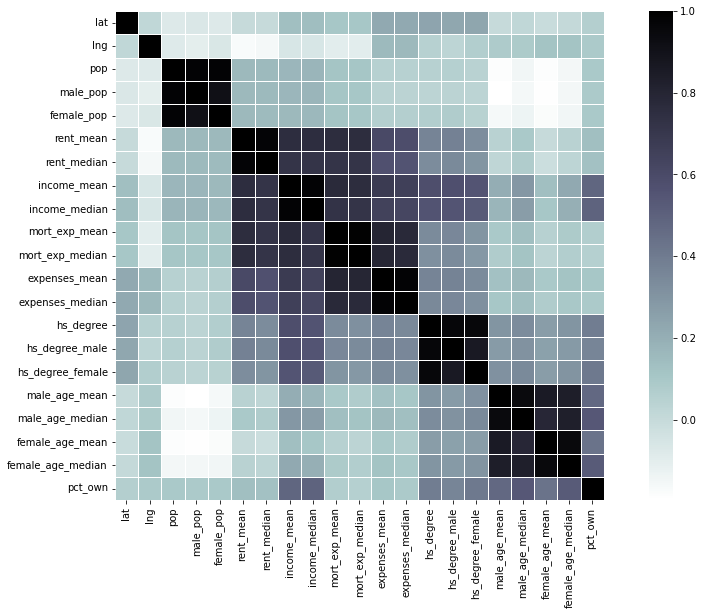

In [6]:
# create heatmap of correlations
plt.figure(figsize = (16,9))
heatmap = sns.heatmap(corr_matrix,
                     square = True,
                     linewidths = .5,
                     cmap = 'bone_r',
                     xticklabels = 'auto',
                     yticklabels = 'auto',
                     mask = None,
                     cbar = True,
                     )
print(heatmap)

What we are seeing in terms of correlations there are 
1. No correlations between population and age, 
2. Weak correlations between age and income, which is actually surprising as I'd expect older people to be earning more
    as they are more set in their careers.
3. Stronger correlation, but still in the .6 to .8 range, of high school graduate to income
4. Stronger correlation, but still in the .6 to .8 range, or income to ownership
5. Strong correlation still, in the .7 to .9 range, of rent to income
6. Strong correlation, in the .7 to .9 range of mortgage to income
7. Strong correlation, in the .6 to .8 range of expenses to rent

## 4.b. Scatterplots

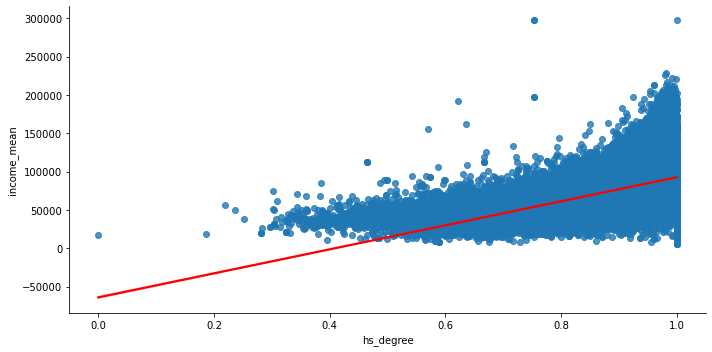

In [7]:
# create scatterplot for hs_degree vs income_mean
sns.lmplot(x = 'hs_degree', y = 'income_mean', data = real, 
           line_kws = {'color' : 'red'}, aspect = 2)

We can see that the high school degree does have a positive bearing on income, with more outliers in the "have degree" set 
earning more, likely due to further education after high school.

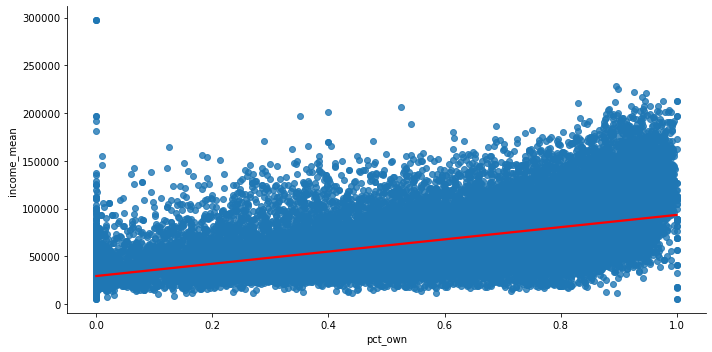

In [8]:
# create scatterplot for pct_own vs income_mean
sns.lmplot(x = 'pct_own', y = 'income_mean', data = real, 
           line_kws = {'color' : 'red'}, aspect = 2)

We can see that generally, higher income lends itself to home ownership, although there are some definite outliers in the 
higher income bracket that are renting.

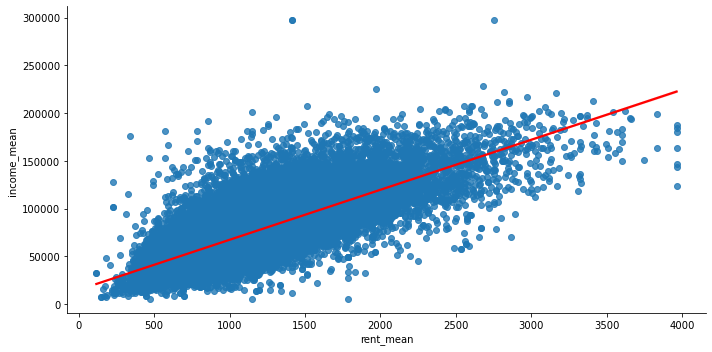

In [9]:
# create scatterplot for rent_mean vs income_mean
sns.lmplot(x = 'rent_mean', y = 'income_mean', data = real, 
           line_kws = {'color' : 'red'}, aspect = 2)

We can see here a stronger correlation between income and price paid for rent. There are a few outliers of high income people living well below their means

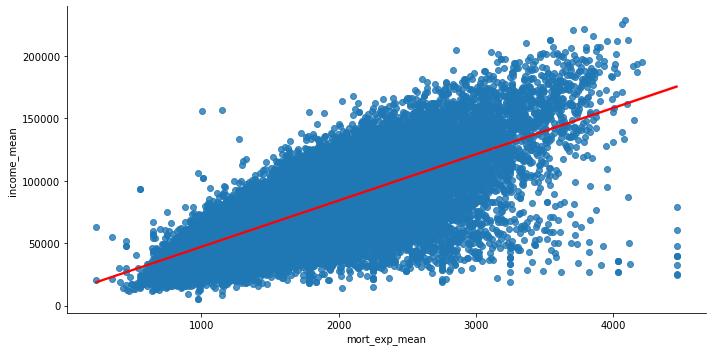

In [10]:
# create scatterplot for mort_exp_mean vs income_mean
sns.lmplot(x = 'mort_exp_mean', y = 'income_mean', data = real, 
           line_kws = {'color' : 'red'}, aspect = 2)

There is a strong correlation between mortgage and expenses to income, although it does appear that there are quite a few living well above their means

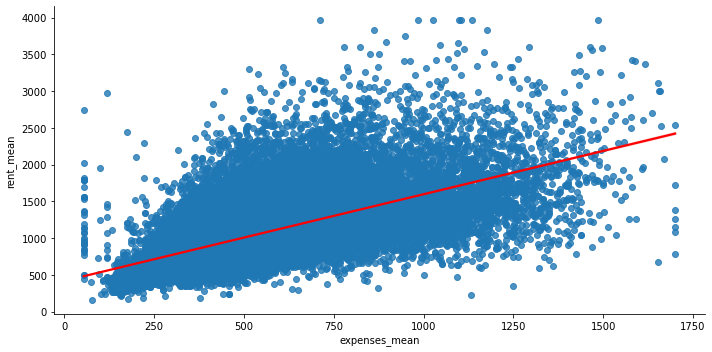

In [11]:
# create scatterplot for expenses_mean vs rent_mean
sns.lmplot(x = 'expenses_mean', y = 'rent_mean', data = real, 
           line_kws = {'color' : 'red'}, aspect = 2)

While there is an overall correlation between expenses and rent, there are several outliers with higher rent and only medium expenses

## 4.c. Pair Plot

In [12]:
# create subset for pair plot
pair = real[['income_mean', 'hs_degree', 'rent_mean', 'mort_exp_mean', 'pct_own']]

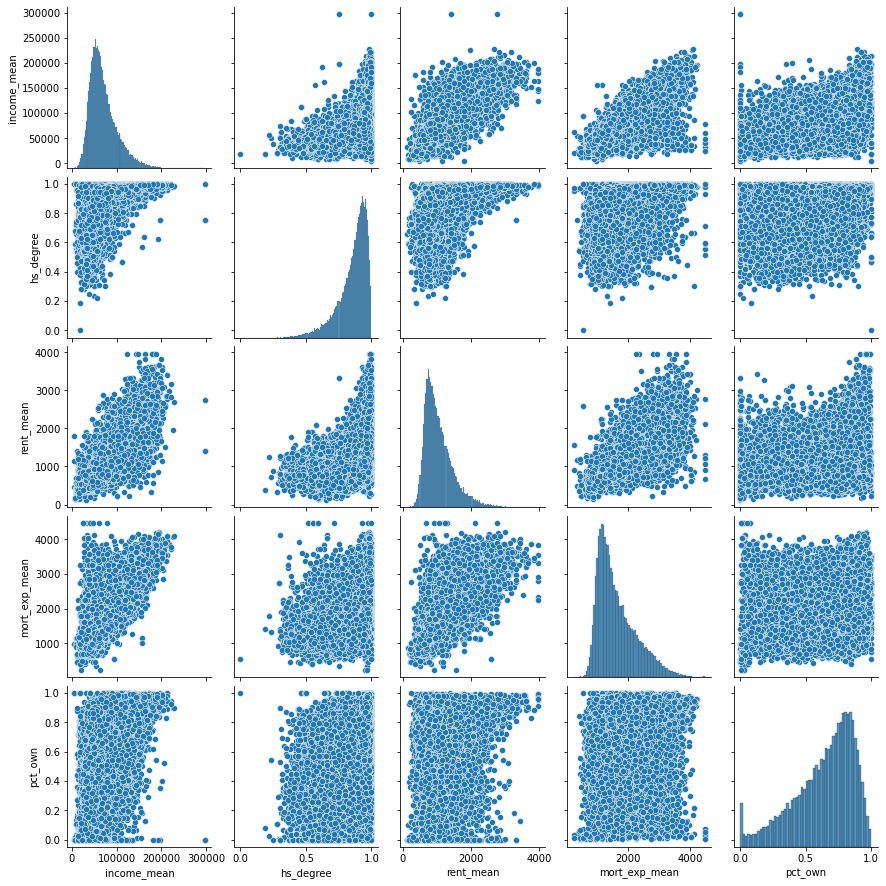

In [13]:
# create pair plot
sns.pairplot(pair)

The variables tend to clump, in high school degree vs percent ownership, it's obvious that having a high school degree means you're more likely to own a home.
Having a high school degree, which brings more income, also increases rent and mortgage plus expenses, but we knew that.
Mortgage plus expenses and rent also have very similar distributions vs income, which begs the question of why rent if owning is better for you overall (which we will NOT be exploring because those are very complicated answers that this data cannot possibly answer).

In [14]:
#create second subset for pair plot
pair2=real[['hs_degree_male', 'hs_degree_female', 'rent_mean', 'mort_exp_mean', 'pct_own']]

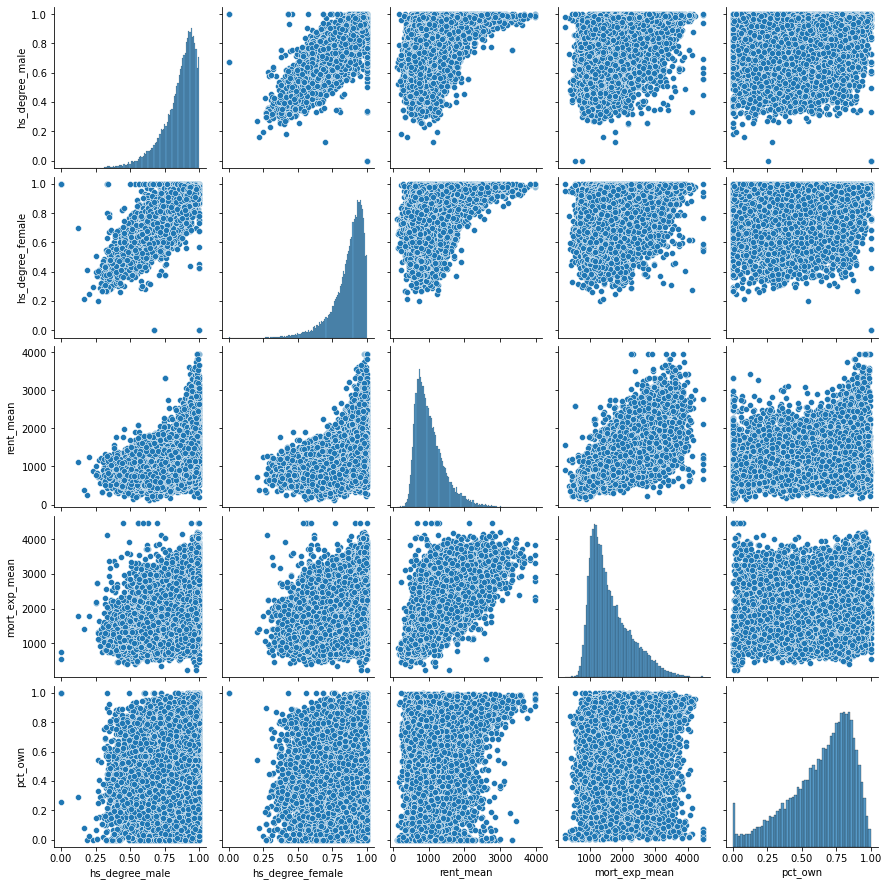

In [15]:
# create second pair plot
sns.pairplot(pair2)

It looks like gender does not play a huge role in percent ownership, cost of rent or mortgage plus expenses.

## 4.d. Categorical Plot

In [16]:
# to ensure charts are displayed
%matplotlib inline

<AxesSubplot:xlabel='rent_mean', ylabel='Count'>

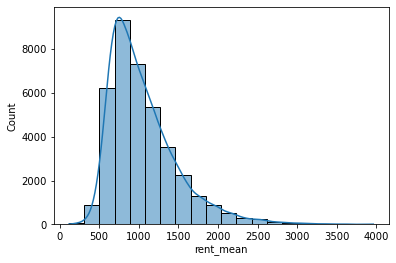

In [17]:
# use histogram to find distribution of variable
sns.histplot(real['rent_mean'], bins = 20, kde = True)

In [18]:
# define categories
real.loc[real['rent_mean'] <= 750, 'rent_cost'] = 'low'

In [19]:
real.loc[(real['rent_mean'] > 750) & (real['rent_mean'] < 1500), 'rent_cost'] = 'medium'

In [20]:
real.loc[real['rent_mean'] >= 1500, 'rent_cost'] = 'high'

In [21]:
real['rent_cost'].value_counts(dropna = False)

medium    23289
low       10014
high       5265
NaN         462
Name: rent_cost, dtype: int64

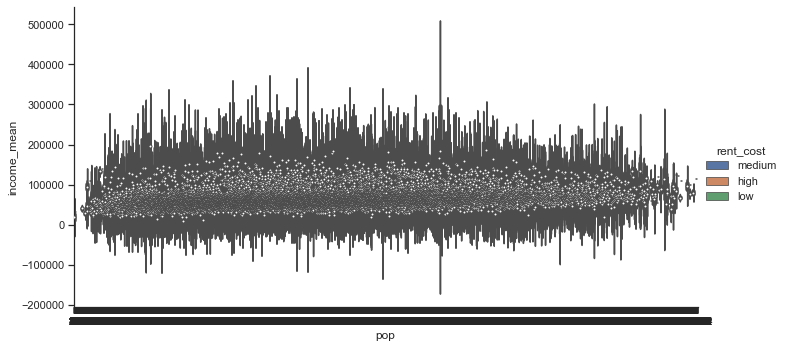

In [36]:
#create catplot

g = sns.catplot(x = 'pop', y = 'income_mean', hue = 'rent_cost', data = real, kind = 'violin', aspect = 2)

There doesn't appear to be a correlation between population density and median income or rent cost. This was the only iteration of catplot that actually output anything. This may not be the best tool for the job for my analysis.

# 5. Key Questions

## 5.a. Does gender distribution play a role in percentage of home ownership per area?
This is a better question to be answered using the map features in Tableau.

## 5.b. Does high school diploma play a role in family income?

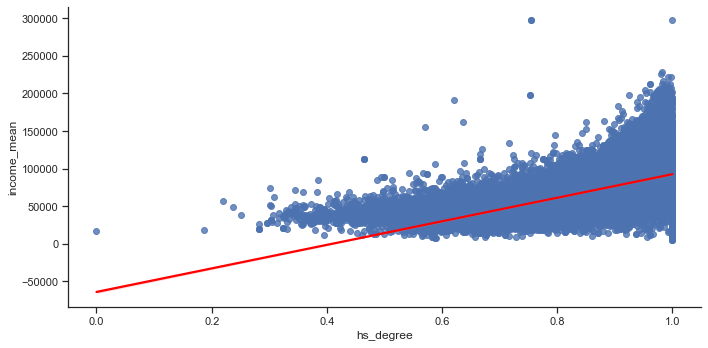

In [37]:
# create scatterplot for hs_degree vs income_mean
KQ2 = sns.lmplot(x = 'hs_degree', y = 'income_mean', data = real, 
           line_kws = {'color' : 'red'}, aspect = 2)

Yes, there does appear to be a correlation between having a high school degree and mean income.

## 5.c.	Does high school diploma play a role in mortgage and expenses?

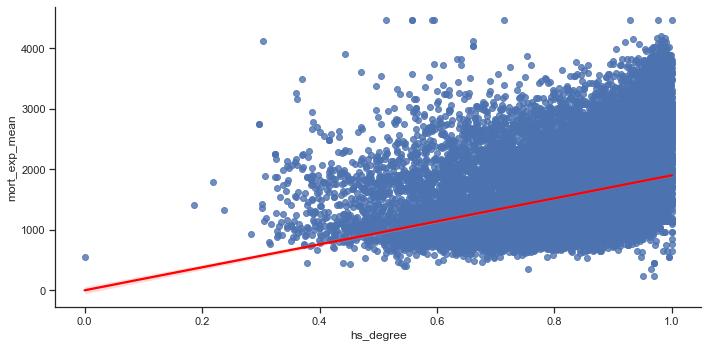

In [38]:
# create scatterplot for hs_degree vs mort_exp_mean
KQ3 = sns.lmplot(x = 'hs_degree', y = 'mort_exp_mean', data = real, 
           line_kws = {'color' : 'red'}, aspect = 2)

There is a similar correlation between high school degree and mortgage + expenses, which makes sense as people will spend what they have to be comfortable. However, we can see there are many more mortgages + expenses above the correlation line than income above. This may be due to higher education that the high school degree doesn't account for.

## 5.d. Hypothesis: Where there are more male population and a higher percentage of high school diplomas, there will be a higher percentage of home ownership.

This is another one that will do better with a map to compare across the states.

# 6. Additional Questions Raised

a.	How does population per state change income?

b.	Does population spread (male vs female per location) affect rent?

c.	Does population spread (male vs female per location) affect income?

d.	Is there anything we can see that impacts percent of population that owns a home vs renting?

## 6.a. Additional Hypothesis

Hypotheses: Distance to larger population centers will mean that percent ownership will go down as it's typically more affordable to rent in a city than it is to own.

# 7. Export

In [39]:
#export to csv
real.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'real.4.26.22.csv'))

In [41]:
# save fig
KQ2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'KQ2.png'))

In [42]:
KQ3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'KQ3.png'))